<a href="https://colab.research.google.com/github/andydaehn/Drug_Classification/blob/main/Scratch_Drug_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drug Classification Analysis

This analysis will help predict the best drug to use for a particular patient, based on medical data from 200 patients, by classifying the patient to the drug profile.

In [1]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Libraries and Data

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report

# Pretty display for notebooks
%matplotlib inline

# Ensure visualizations can be viewed by all
vis_color = 'colorblind'
hex_color = '#004c99'
cmap_color = 'jet'

# Load the dataset
explore_df = pd.read_csv('drug200.csv')

## Exploratory Data Analysis

In [3]:
explore_df.head()
 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
explore_df.describe()
   

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
explore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Analysis of Numerical Features

In [6]:
# Combine all columns into list
explore_cols = explore_df.columns.to_list()
explore_cols

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

In [7]:
# # Build App
# app = JupyterDash(__name__)
# app.layout = html.Div([
#     html.H1('Feature Analysis'),
#     dcc.Graph(id='graph'),
#     html.Label([
#         "colorscale",
#         dcc.Dropdown(
#             id='colorscale-dropdown', clearable=False,
#             value='plasma', options=[
#                 {'label': c, 'value': c}
#                 for c in px.colors.named_colorscales()
#             ])
#     ]),
# ])
# # Define callback to update graph
# @app.callback(
#     Output('graph', 'figure'),
#     [Input("colorscale-dropdown", "value")]
# )
# def update_figure(colorscale):
#     return px.scatter(
#         df, x="total_bill", y="tip", color="size",
#         color_continuous_scale=colorscale,
#         render_mode="webgl", title="Tips"
#     )
# # Run app and display result inline in the notebook
# app.run_server(mode='inline')

In [8]:
explore_df.count()

Age            200
Sex            200
BP             200
Cholesterol    200
Na_to_K        200
Drug           200
dtype: int64

In [9]:
import dash
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px

# Load Data
#df = px.data.tips()
# Build App

# df = explore_df

# # df = pd.read_csv(
# #     "https://raw.githubusercontent.com/ThuwarakeshM/geting-started-with-plottly-dash/main/life_expectancy.csv"
# # )
# app = JupyterDash(__name__)
# fig = px.scatter(
#     df,
#     x="Na_to_K",
#     y="Age",
#     #size="Population",
#     color="Sex",
#     # hover_name="Country",
#     # log_x=True,
#     # size_max=60,
# )

# app.layout = html.Div([dcc.Graph(id="Feature Analysis", figure=fig)])

# # Run app and display result inline in the notebook
# app.run_server(mode='inline')





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>

In [10]:
# app = JupyterDash(__name__)
# fig = px.histogram(
#     df,
#     x="Na_to_K",
#     #y="Age",
#     #size="Population",
#     color="Drug",
#     # hover_name="Country",
#     # log_x=True,
#     # size_max=60,
# )

# app.layout = html.Div([dcc.Graph(id="Feature Analysis", figure=fig)])

# # Run app and display result inline in the notebook
# app.run_server(mode='inline')

<IPython.core.display.Javascript object>

###Univariate Analysis

In [47]:
app = JupyterDash(__name__)

#df = px.data.stocks()
df = explore_df
#'Univariate Analysis', 

app.layout = html.Div(id = 'parent', children = [
    html.H1(id = 'H1', children = '',style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),

        dcc.Dropdown( id = 'dropdown',
        options = [
            {'label':'Age', 'value':'Age' },
            {'label': 'Sex', 'value':'Sex'},
            {'label': 'BP', 'value':'BP'},
            {'label':'Cholesterol', 'value':'Cholesterol'},
            {'label': 'Na_to_K', 'value':'Na_to_K'},
            {'label': 'Drug', 'value':'Drug'},
            ],
        value = 'Na_to_K'),
        dcc.Graph(id = 'bar_plot')
    ],style={'width': '20%'})
    
    
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    fig = go.Figure([go.Histogram(x = df['{}'.format(dropdown_value)],
                                  nbinsx=30)])
    
    fig.update_layout(title = '{}'.format(dropdown_value),
                      xaxis_title = 'Features',
                      yaxis_title = 'Count',
                      autosize=False,
                      width=700,
                      height=400,
                      margin=dict(
                          l=50,
                          r=50,
                          b=50,
                          t=50,
                          pad=4),)
    return fig  

  # Run app and display result inline in the notebook
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

In [ ]:
df.head

<bound method NDFrame.head of            date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
0    2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1    2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2    2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
3    2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
4    2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708
..          ...       ...       ...       ...       ...       ...       ...
100  2019-12-02  1.216280  1.546914  1.425061  1.075997  1.463641  1.720717
101  2019-12-09  1.222821  1.572286  1.432660  1.038855  1.421496  1.752239
102  2019-12-16  1.224418  1.596800  1.453455  1.104094  1.604362  1.784896
103  2019-12-23  1.226504  1.656000  1.521226  1.113728  1.567170  1.802472
104  2019-12-30  1.213014  1.678000  1.503360  1.098475  1.540883  1.788185

[105 rows x 7 columns]>

In [ ]:
# app = JupyterDash(__name__)

# #df = px.data.stocks()
# df = explore_df


# app.layout = html.Div(id = 'parent', children = [
#     html.H1(id = 'H1', children = 'Styling using html components', style = {'textAlign':'center',\
#                                             'marginTop':40,'marginBottom':40}),

#         dcc.Dropdown( id = 'dropdown',
#         options = [
#             {'label':'Google', 'value':'GOOG' },
#             {'label': 'Apple', 'value':'AAPL'},
#             {'label': 'Amazon', 'value':'AMZN'},
#             ],
#         value = 'GOOG'),
#         dcc.Graph(id = 'bar_plot')
#     ])
    
    
# @app.callback(Output(component_id='bar_plot', component_property= 'figure'),
#               [Input(component_id='dropdown', component_property= 'value')])
# def graph_update(dropdown_value):
#     print(dropdown_value)
#     fig = go.Figure([go.Scatter(x = df['date'], y = df['{}'.format(dropdown_value)],\
#                      line = dict(color = 'firebrick', width = 4))
#                      ])
    
#     fig.update_layout(title = 'Stock prices over time',
#                       xaxis_title = 'Dates',
#                       yaxis_title = 'Prices',
#                       autosize=False,
#                       width=500,
#                       height=500,
#                       margin=dict(
#                           l=50,
#                           r=50,
#                           b=100,
#                           t=100,
#                           pad=4
#     ),
#     paper_bgcolor="LightSteelBlue",
#                       )
#     return fig  

#   # Run app and display result inline in the notebook
# app.run_server(mode='inline')

In [ ]:
# app = JupyterDash(__name__)
# app.layout = html.Div([
#     html.H1('Feature Analysis'),
#     dcc.Graph(id='graph'),
#     html.Label([
#         'features',
#         dcc.Dropdown(
#             id='feature-dropdown', clearable=False,
#             value='Age', options=[
#                 {'label': 'Age', 'value': 'Age'},
#                 {'label': 'Na_to_K', 'value': 'Na_to_K'},
#             ])
#     ]),
# ])
# # Define callback to update graph
# @app.callback(
#     Output('graph', 'figure'),
#     [Input('feature-dropdown', 'value')]
# )
# def update_figure(explore_df):
#     return px.histogram(
#         df, x='total_bill', color='size',
#         render_mode='webgl', title='Tips'
#     )
# # Run app and display result inline in the notebook
# app.run_server(mode='inline')

<IPython.core.display.Javascript object>

In [ ]:
# Plot numerical column
for col in explore_df:
    plt.figure()
    sns.histplot(data=explore_df,x=col,bins=15,color=hex_color)
    plt.title(f"Distribution of {col}")
    print('\n')

**Inference:** Na_to_k has a positive skew. Check skewness and kurtosis of Na_to_K

In [ ]:
# Skewness
print("Skewness: %f" % explore_df['Na_to_K'].skew())

Skewness: 1.039341


**Inference**: Drug Y is widely used compared to other drugs.

### Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 49.5% of the points cannot be placed; y

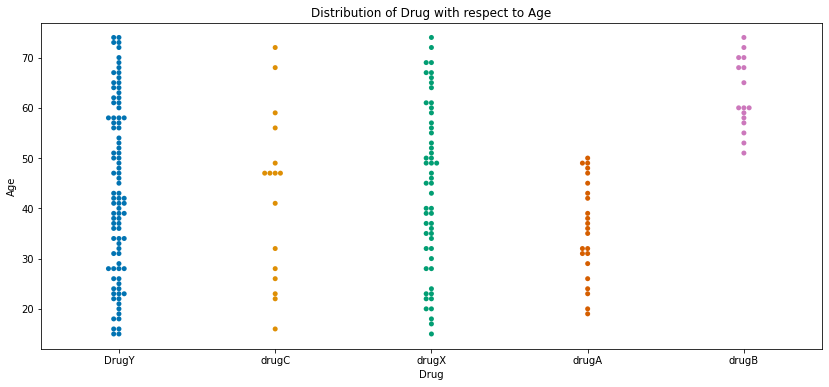

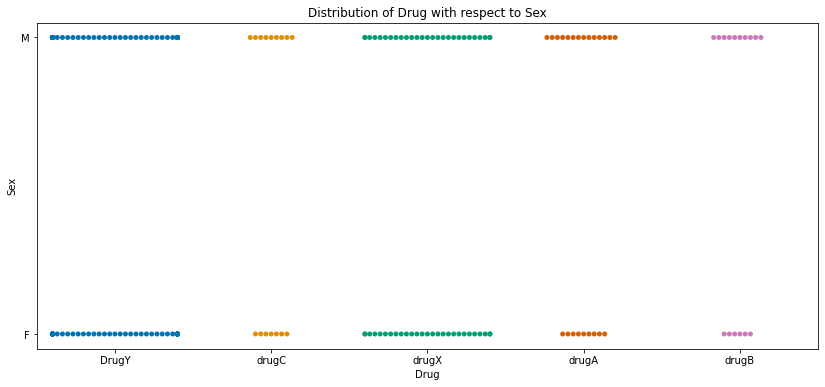

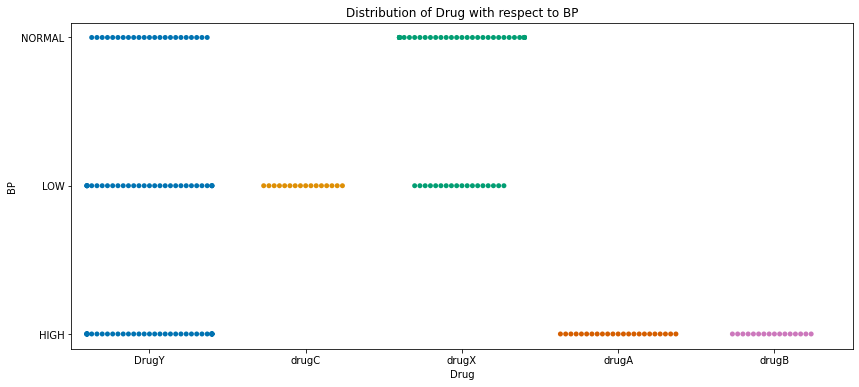

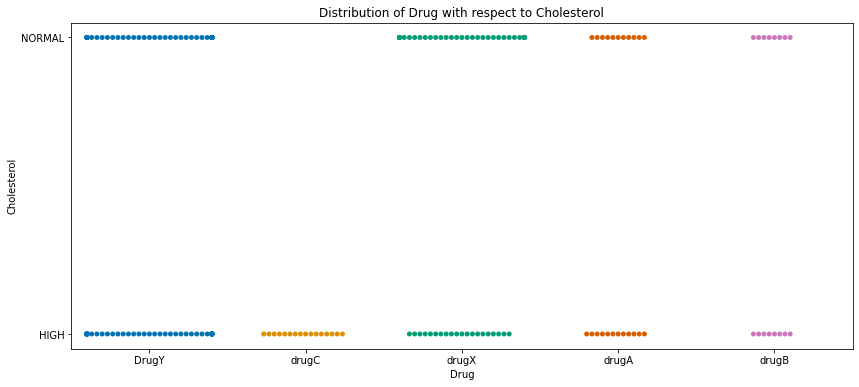

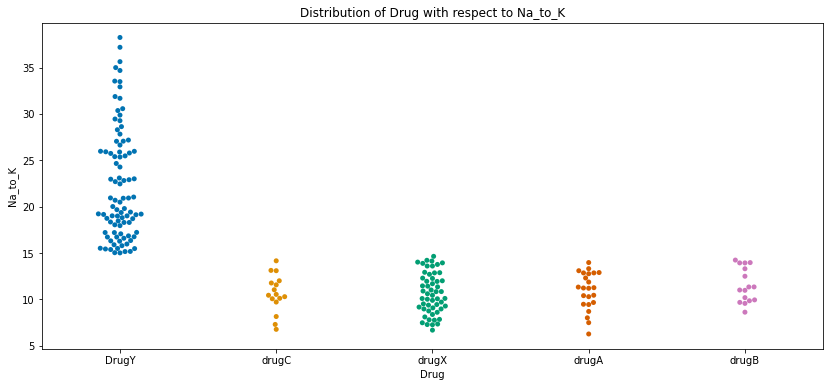

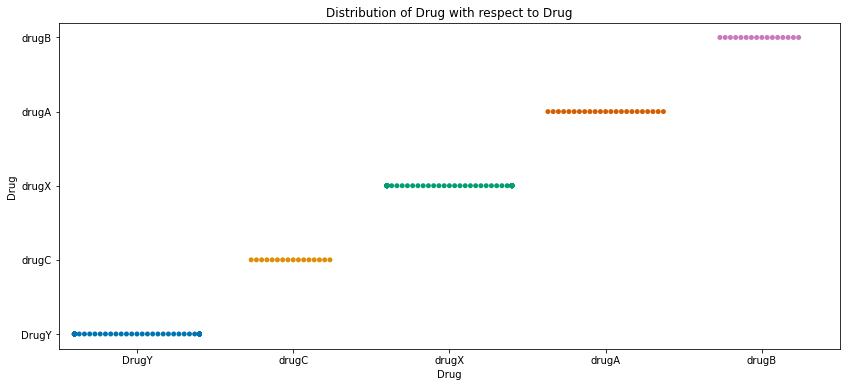

In [ ]:
# Bivariate for numerical columns
for col in explore_cols:
    plt.figure(figsize=(14,6))
    sns.swarmplot(data=explore_df,x='Drug',y=col,palette=vis_color)
    plt.title(f"Distribution of Drug with respect to {col}")

**Inference:** Age may have a correlation with drugA and drugB. Na_to_K appears to have a high correlation to drugY.

### Multivariate Analysis

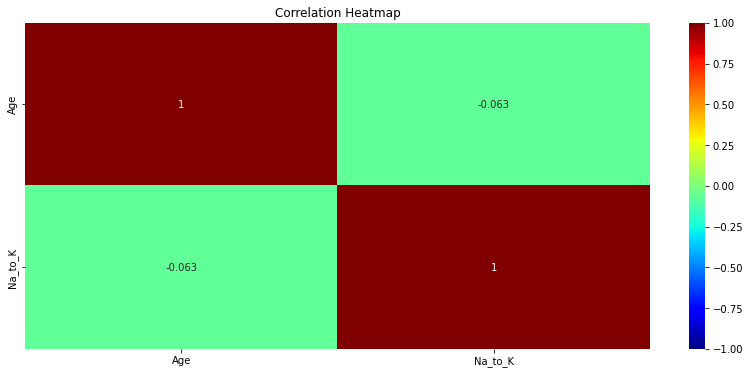

In [ ]:
# Create correlation matrix
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(explore_df.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap_color)
heatmap.set_title('Correlation Heatmap');

In [ ]:
explore_df.columns


Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
# target_cols = ['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']
# feat_cols = ['Age', 'Na_to_K', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL','Cholesterol_HIGH', 'Cholesterol_NORMAL']

# for col in feat_cols:
#     # View the distrubution of drug compared with Na_to_K and BP
#     plt.figure(figsize=(14,6))
#     sns.barplot(x=target_cols,y=explore_df[col],palette=vis_color)
#     plt.title('Distribution of Drug with respect to Na_to_K and Blood Pressure')

In [ ]:
# for col in feat_cols:
#     # View the distrubution of drug compared with Na_to_K and BP
#     plt.figure(figsize=(14,6))
#     sns.swarmplot(data=explore_df,x=target_cols,y=col,hue='BP',palette=vis_color)
#     plt.title('Distribution of Drug with respect to Na_to_K and Blood Pressure')

## Data Wrangling


In [ ]:
# # Handle the skewness in Na_to_K
# print('The original skewness of Na_to_K')
# print("Skewness: %f" % explore_df['Na_to_K'].skew())

# print('\n')

# # Use square root to adjust the skewness
# explore_df['Na_to_K'] = np.sqrt(explore_df['Na_to_K'])

# #Plot new
# plt.figure(figsize=(14,6))
# sns.histplot(data=explore_df,x='Na_to_K',bins=15,color=hex_color)
# plt.title(f"New Distribution of Na_to_K")

# print('The new skewness of Na_to_K')
# print("Skewness: %f" % explore_df['Na_to_K'].skew())

In [ ]:
# Make age into 7 groups
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
explore_df['Age_binned'] = pd.cut(explore_df['Age'], bins=bin_age, labels=category_age)
df_drug = explore_df.drop(['Age'], axis = 1)

In [ ]:
# Make Na_to_K into 5 groups
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
explore_df['Na_to_K_binned'] = pd.cut(explore_df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
explore_df = explore_df.drop(['Na_to_K'], axis = 1)

In [ ]:
# Split data into features and target
y_df = explore_df['Drug']
X_df = explore_df.drop(['Drug'],axis=1)


,Age,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned
0,23,F,HIGH,HIGH,20s,20-30
1,47,M,LOW,HIGH,40s,10-20
2,47,M,LOW,HIGH,40s,10-20
3,28,F,NORMAL,HIGH,20s,<10
4,61,F,LOW,HIGH,60s,10-20
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,50s,10-20
196,16,M,LOW,HIGH,<20s,10-20
197,52,M,NORMAL,HIGH,50s,10-20
198,23,M,NORMAL,NORMAL,20s,10-20


## Split, Encode, Train, and Test the Data

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=22)

In [ ]:
# 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
# SMOTE to correct DrugY having more than the others
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [ ]:
# Train the data on the Random Forest Classifier and test the accuracy
rfc = RandomForestClassifier(max_leaf_nodes=15)
rfc.fit(X_train,y_train)

# Making predictions
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Get Scores
print('Results for Random Forest Classifier')
print('F1 Score: ', round(f1_score(y_test, y_test_pred, average='weighted')*100,2),'%')
print(classification_report(y_test,y_test_pred))

Results for Random Forest Classifier
F1 Score:  85.66 %
              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        20
       drugA       0.70      1.00      0.82         7
       drugB       1.00      1.00      1.00         4
       drugC       0.33      1.00      0.50         1
       drugX       0.89      1.00      0.94         8

    accuracy                           0.85        40
   macro avg       0.78      0.94      0.82        40
weighted avg       0.91      0.85      0.86        40



In [ ]:
# Train the data on the Decision Tree Classifier and test the accuracy
dtc = DecisionTreeClassifier(max_leaf_nodes=30)
dtc.fit(X_train,y_train)

# Making predictions
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# Get Scores
print('Results for Decision Tree Classifier')
print('F1 Score: ', round(f1_score(y_test, y_test_pred, average='weighted')*100,2),'%')
print(classification_report(y_test,y_test_pred))

Results for Decision Tree Classifier
F1 Score:  83.35 %
              precision    recall  f1-score   support

       DrugY       0.84      0.80      0.82        20
       drugA       0.86      0.86      0.86         7
       drugB       1.00      0.75      0.86         4
       drugC       0.33      1.00      0.50         1
       drugX       0.88      0.88      0.88         8

    accuracy                           0.82        40
   macro avg       0.78      0.86      0.78        40
weighted avg       0.85      0.82      0.83        40

